### AI3001: Advanced Machine Learning

#### Homework 2

#### Tanmay Goyal

#### AI20BTECH11021

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
K = [10,20 ,50,100]
Horizons = [1000 , 10000 , 50000, 100000 , 500000 , 1000000 , 5000000]

In [3]:
def exp3 (k , t):
    # we assume all the arms are numbered from 1 to K

    gamma = np.sqrt(k * np.log(k)/(2 * t))
    weights = np.array([1.0 for i in range(k)])
    means = np.array([1 - (i+1) / (k+1) for i in range(k)])
    sum_reward = 0

    for time in range(t):
        probs = (1 - gamma) / weights.sum() * weights + gamma / k
        arm_chosen = np.random.choice(k , 1 , p = probs)
        reward = np.random.binomial(1 , means[arm_chosen])
        sum_reward += reward
        weights[arm_chosen] *= np.exp(gamma * reward / (probs[arm_chosen] * k))


    return t * np.max(means) - sum_reward
    


In [4]:
def exploration_seperated(k,t):
    
    eps = np.power(t , -1/3)
    N = np.array([0 for i in range(k)])
    means = np.array([1 - (i+1) / (k+1) for i in range(k)])

    time_bound = np.int64(np.floor(eps * t / k) * k)
    reward_sum = np.array([0 for i in range(k)])
    
    for time in range(time_bound):
        arm_chosen = time % k
        N[arm_chosen] += 1
        reward_sum[arm_chosen] += np.random.binomial(1 , means[arm_chosen])

    mu = np.argmax(reward_sum / N)

    sum = 0
    for time in range(time_bound , t):
        sum += np.random.binomial(1 , means[mu])

    sum += reward_sum.sum()

    return t * np.max(means) - sum


In [5]:
def ucb1(k , t):
    
    N = np.array([0 for i in range(k)])
    means = np.array([1 - (i+1) / (k+1) for i in range(k)])
    reward_sum = np.array([0 for i in range(k)])

    for time in range(k):
        arm_chosen = time
        N[arm_chosen] += 1
        reward_sum[arm_chosen] += np.random.binomial(1 , means[arm_chosen])

    for time in range(k+1 , t):
        arm_chosen = np.argmax(reward_sum / N + np.sqrt(2 * np.log(time) / N))
        reward = np.random.binomial(1 , means[arm_chosen])
        reward_sum[arm_chosen] += reward
        N[arm_chosen] += 1

    return t * np.max(means) - reward_sum.sum()

In [6]:
def thompson(k , t):

    s = np.array([0 for i in range(k)])
    f = np.array([0 for i in range(k)])
    means = np.array([1 - (i+1) / (k+1) for i in range(k)])

    for time in range(t):
        lamda = np.array([np.random.beta(s[i]+1 , f[i]+1 , 1) for i in range(len(s))])
        arm_chosen = np.argmax(lamda)
        reward = np.random.binomial(1 , means[arm_chosen])
        s[arm_chosen] += reward
        f[arm_chosen] += 1-reward

    return t * np.max(means) - s.sum()

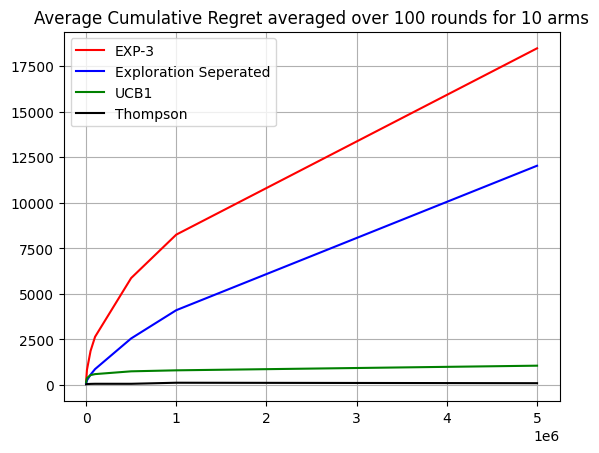

In [7]:
k = K[0]
n = 100
exp3_vals = []
exploration_seperated_vals = []
ucb1_vals = []
thompson_vals = []

for t in Horizons:
    
    sum = 0
    for j in range(n):
        sum += exp3(k , t)
    sum /= n
    exp3_vals.append(sum)

    sum = 0
    for j in range(n):
        sum += exploration_seperated(k , t)
    sum /= n
    exploration_seperated_vals.append(sum)
 
    sum = 0
    for j in range(n):
        sum += ucb1(k , t)
    sum /= n
    ucb1_vals.append(sum)

    sum = 0
    for j in range(n):
        sum += thompson(k , t)
    sum /= n
    thompson_vals.append(sum)

plt.plot(Horizons , exp3_vals , 'r-' , label = 'EXP-3')
plt.plot(Horizons , exploration_seperated_vals , 'b-' , label = 'Exploration Seperated')
plt.plot(Horizons , ucb1_vals , 'g-' , label = 'UCB1')
plt.plot(Horizons , thompson_vals , 'k-' , label = 'Thompson')
plt.grid(True)
plt.legend()
plt.title("Average Cumulative Regret averaged over {} rounds for {} arms".format(n , k))
plt.show()  


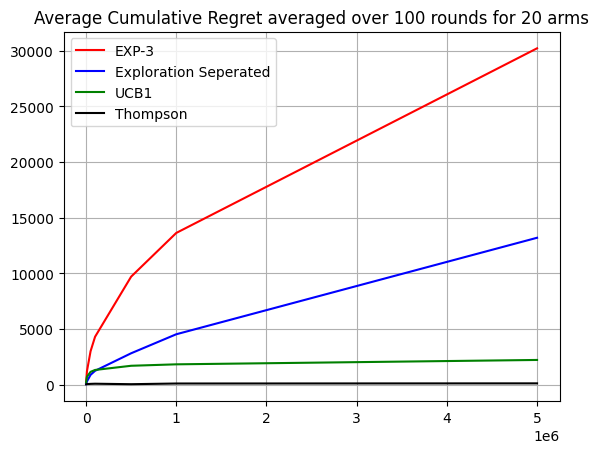

In [8]:
k = K[1]
n = 100
exp3_vals = []
exploration_seperated_vals = []
ucb1_vals = []
thompson_vals = []

for t in Horizons:
    
    sum = 0
    for j in range(n):
        sum += exp3(k , t)
    sum /= n
    exp3_vals.append(sum)

    sum = 0
    for j in range(n):
        sum += exploration_seperated(k , t)
    sum /= n
    exploration_seperated_vals.append(sum)
 
    sum = 0
    for j in range(n):
        sum += ucb1(k , t)
    sum /= n
    ucb1_vals.append(sum)

    sum = 0
    for j in range(n):
        sum += thompson(k , t)
    sum /= n
    thompson_vals.append(sum)

plt.plot(Horizons , exp3_vals , 'r-' , label = 'EXP-3')
plt.plot(Horizons , exploration_seperated_vals , 'b-' , label = 'Exploration Seperated')
plt.plot(Horizons , ucb1_vals , 'g-' , label = 'UCB1')
plt.plot(Horizons , thompson_vals , 'k-' , label = 'Thompson')
plt.grid(True)
plt.legend()
plt.title("Average Cumulative Regret averaged over {} rounds for {} arms".format(n , k))
plt.show()


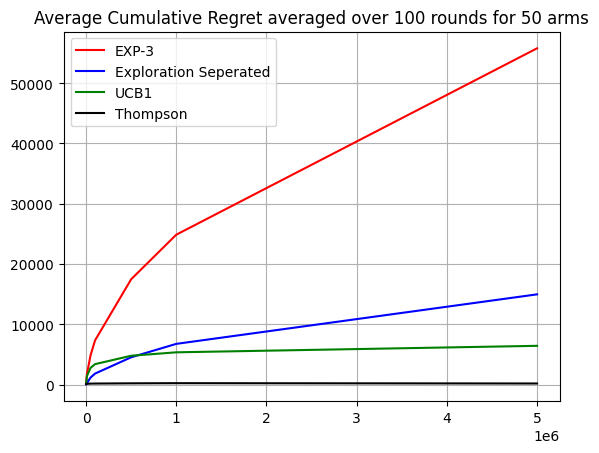

In [9]:
k = K[2]
n = 100
exp3_vals = []
exploration_seperated_vals = []
ucb1_vals = []
thompson_vals = []

for t in Horizons:
    
    sum = 0
    for j in range(n):
        sum += exp3(k , t)
    sum /= n
    exp3_vals.append(sum)

    sum = 0
    for j in range(n):
        sum += exploration_seperated(k , t)
    sum /= n
    exploration_seperated_vals.append(sum)
 
    sum = 0
    for j in range(n):
        sum += ucb1(k , t)
    sum /= n
    ucb1_vals.append(sum)

    sum = 0
    for j in range(n):
        sum += thompson(k , t)
    sum /= n
    thompson_vals.append(sum)

plt.plot(Horizons , exp3_vals , 'r-' , label = 'EXP-3')
plt.plot(Horizons , exploration_seperated_vals , 'b-' , label = 'Exploration Seperated')
plt.plot(Horizons , ucb1_vals , 'g-' , label = 'UCB1')
plt.plot(Horizons , thompson_vals , 'k-' , label = 'Thompson')
plt.grid(True)
plt.legend()
plt.title("Average Cumulative Regret averaged over {} rounds for {} arms".format(n , k))
plt.show()


In [10]:
k = K[3]
n = 100
exp3_vals = []
exploration_seperated_vals = []
ucb1_vals = []
thompson_vals = []

for t in Horizons:
    
    sum = 0
    for j in range(n):
        sum += exp3(k , t)
    sum /= n
    exp3_vals.append(sum)

    sum = 0
    for j in range(n):
        sum += exploration_seperated(k , t)
    sum /= n
    exploration_seperated_vals.append(sum)
 
    sum = 0
    for j in range(n):
        sum += ucb1(k , t)
    sum /= n
    ucb1_vals.append(sum)

    sum = 0
    for j in range(n):
        sum += thompson(k , t)
    sum /= n
    thompson_vals.append(sum)

plt.plot(Horizons , exp3_vals , 'r-' , label = 'EXP-3')
plt.plot(Horizons , exploration_seperated_vals , 'b-' , label = 'Exploration Seperated')
plt.plot(Horizons , ucb1_vals , 'g-' , label = 'UCB1')
plt.plot(Horizons , thompson_vals , 'k-' , label = 'Thompson')
plt.grid(True)
plt.legend()
plt.title("Average Cumulative Regret averaged over {} rounds for {} arms".format(n , k))
plt.show()


KeyboardInterrupt: 